The first step is to download import the relevant libraries required for the model.This includes the pandas, numpy and matplotlib libraries. An easier way to get all these libraries in one place is to download and install the Anaconda distribution, which is widely used for scientific computations. The size of the figures and the dpi for the figures is pre-defined to get publication quality graphs. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['savefig.dpi'] = 1200
plt.rcParams["figure.figsize"] = [15,15]

In /home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two mi

## Molecular weight of the different chemical species involved in the chemical reaction are defined. 

In [2]:
mol_weight_fe=55.845 #in grams
mol_weight_fe2o3=159.688 #in grams 
mol_weight_Sio2=60.0843 #in grams
mol_weight_al2o3=101.9613 #in grams
mol_weight_feo=71.844 #in grams
mol_weight_H2=2.01588 #in grams
mol_weight_CH4=16.04 # in grams
mol_weight_C=12.017 # in grams
mol_weight_H2O=18.0153 #in grams
mol_weight_cao=56.077#in grams
mol_weight_mgo=40.3044 #in grams
mol_weight_al2o3=101.9613 #in grams
mol_weight_tin=118.07

## Key Assumptions for the model

In [3]:
methane_ems=2.42 # kgco2/kgch4 by considering 1 MMBTU=1055.055 MJ and calorific value of CH4=48 MJ/kg
#amount of CO2 released by burning 1 kg of CH4
#Value for Germany taken from : 
##https://www.carbonfootprint.com/docs/2018_8_electricity_factors_august_2018_-_online_sources.pdf
grid_emission_factor=0.413#ton/MWh
ng_cal=48000 #ref https://www.jica.go.jp/english/our_work/climate_change/c8h0vm0000f7klc7-att/Appendix_E.pdf
# Kj/kg calorific value of natural gas 
ng_upstream_emission=17.2 #gCo2/MJ
ng_up_em_kg=(ng_upstream_emission/ng_cal)*1000 #kgCO2/kgCH4
gas_heater_eta=0.85  # Efficiency of the gas fired heater
eta_el=0.9 # Efficiency of the electric heater used for the reactor 
el_heater_cost=50 # Million USD
tinprice=18000 #USD/T

ss_steel_cost=2500 #USD/ton
refractory_cost=800 #USD/ton
steel_density=7700 #kg/m3
refractory_density=2970 #kg/m3
tank_manufacturing=1000 #USD/ton
refractory_labour=1000 #USD/ton
#Economic assumptions
lf_reac=10
lf_dri=2


## Economic assumptions

In [4]:
plant_life=20
carbon_price=200
ng_price=6.58 #USD/MMBTU
iron_ore_cost=90 #usd/ton
electricity_cost=56.12 #USD/MWh # Germany
emission_cost=50# USD 30 per ton 
carbon_steel_price=650 #USD/ton
tax_rate=0.35
interest_rate=0.10
emission_factor=0.413 # corresponsding to german emission factor
# Assume that 60% of the carbon produced could be sold
carbon_sold=0.6

In [5]:
### Hydrogen enthalpy coefficients
### Hydrogen enthalpy coefficients
# The value of enthalpy returned is the specific enthalpy in kj/g

def H2_enthalpy_1(T):# T1 and T2 should be in the range of 298-1000 K <br>
    t=T/1000 
    A=33.066718 
    B=-11.363417
    C=11.432816 
    D=-2.772874 
    E=-0.158558 
    F=-9.980797 
    G=172.707974 
    H=0  
    H_t=(A*t +(B*t**2)/2 +(C*t**3)/3 + (D*t**4)/4-(E/t)+F-H)/mol_weight_H2 
    return H_t 
def H2_enthalpy_2(T):#T in range 1000-2500 K 
    t=T/1000 
    A=18.563083 
    B=12.257357 
    C=-2.859786  
    D=0.268238 
    E=1.977990 
    F=-1.147438 
    G=156.288133 
    H=0 
    H_t=(A*t +(B*t**2)/2 +(C*t**3)/3 + (D*t**4)/4-(E/t)+F-H)/mol_weight_H2 
    return H_t 
### Water enthalpy coefficients

def H2O_enthalpy(T):
    t=T/1000 
    A=30.09200  
    B=6.832514 
    C=6.793435 
    D=-2.534480 
    E=0.082139 
    F=-250.8810 
    G=223.3967 
    H=-241.8264 
    H_t=(A*t +(B*t**2)/2 +(C*t**3)/3 + (D*t**4)/4-(E/t)+F-H)/mol_weight_H2O 
    return H_t 

def fe_enthalpy(T):#298-1809 K
    t=T/1000
    A=23.97449
    B=8.367750
    C=0.000277
    D=-0.000088
    E=-0.000005
    F=0.268027
    G=62.06336
    H=7.788015    
    H_t=(A*t +(B*t**2)/2 +(C*t**3)/3 + (D*t**4)/4-(E/t)+F-H)/mol_weight_fe
    return H_t
def fe_enthalpy_2(T):#298-1809 K
    t=T/1000
    A=46.02400
    B=-1.88467*10**(-8)
    C=6.094750*10**(-9)
    D=-6.640301*10**(-10)
    E=-0.8246121*10**(-9)
    F=-10.80543
    G=72.54094
    H=12.39052  
    H_t=(A*t +(B*t**2)/2 +(C*t**3)/3 + (D*t**4)/4-(E/t)+F-H)/mol_weight_fe
    return H_t
def feo_enthalpy(T):
    t=T/1000
    A=45.75120
    B=18.78553
    C=-5.952201
    D=0.852779
    E=-0.081265
    F=-286.7429
    G=110.3120
    H=-272.0441
    H_t=(A*t +(B*t**2)/2 +(C*t**3)/3 + (D*t**4)/4-(E/t)+F-H)/mol_weight_feo
    return H_t
def Al2O3_enthalpy(T):
    t=T/1000
    A=106.0880
    B=36.33740
    C=-13.86730
    D=2.141221
    E=-3.133231
    F=-1705.970
    G=153.9350
    H=-1662.300  
    H_t=(A*t +(B*t**2)/2 +(C*t**3)/3 + (D*t**4)/4-(E/t)+F-H)/mol_weight_al2o3
    return H_t
def sio2_enthalpy(T):
    t=T/1000
    A=58.75
    B=10.279
    C=-0.131384
    D=0.025210
    E=0.025601
    F=-929.3292
    G=105.8092
    H=-910.8568   
    H_t=(A*t +(B*t**2)/2 +(C*t**3)/3 + (D*t**4)/4-(E/t)+F-H)/mol_weight_Sio2
    return H_t
def mgo_enthalpy(T):
    t=T/1000
    A=47.25995
    B=5.681621
    C=-0.872665
    D=0.104300
    E=-1.053955
    F=-619.1316
    G=76.46176
    H=-601.2408
    H_t=(A*t +(B*t**2)/2 +(C*t**3)/3 + (D*t**4)/4-(E/t)+F-H)/mol_weight_cao
    return H_t
def cao_enthalpy(T):
    t=T/1000
    A=49.95403
    B=4.887916
    C=-0.353056
    D=0.046187
    E=-0.825097
    F=-652.9718
    G=92.56096
    H=-635.0894
    H_t=(A*t +(B*t**2)/2 +(C*t**3)/3 + (D*t**4)/4-(E/t)+F-H)/mol_weight_mgo
    return H_t
def CH4_enthalpy_1(T):# T in the range 298-1000 K
    t=T/1000
    A=-0.703029
    B=108.4773
    C=-42.52157
    D=5.862788
    E=0.678565
    F=-76.84376
    G=158.7163
    H=-74.87310
    H_t=(A*t +(B*t**2)/2 +(C*t**3)/3 + (D*t**4)/4-(E/t)+F-H)/mol_weight_CH4
    return H_t
def CH4_enthalpy_2(T):# T in range 1300-6000 K
    t=T/1000
    A=85.81217
    B=11.26467
    C=-2.114146
    D=0.138190
    E=-26.42221
    F=-153.5327
    G=224.4143
    H=-74.87310
    H_t=(A*t +(B*t**2)/2 +(C*t**3)/3 + (D*t**4)/4-(E/t)+F-H)/mol_weight_CH4
    return H_t
def C_enthalpy(T):# T in the range 298-1000 K
    t=T/1000
    A=21.17510
    B=-0.812428
    C=0.448537
    D=-0.043256
    E=-0.013103
    F=710.3470
    G=183.8734
    H=716.6690
    H_t=(A*t +(B*t**2)/2 +(C*t**3)/3 + (D*t**4)/4-(E/t)+F-H)/mol_weight_C
    return H_t# The value of enthalpy returned is the specific enthalpy in kj/g



## Stochiometric calculations for the amount of Hydrogen required for reduction of iron

Iron ore is reducd by hydrogen at a temperature of 800-900 C in an endothermic reaction using 99.5 kJ/mol.<br />
$Fe_{2}O_{3}+ 3H_{2}---> 2Fe + 3H_{2}O$

In [6]:
# Metallization rates considered for the DRI reduction shaft furnace
alpha=0.94 
# Percentage of hematite in the raw material. 
fe2O3_pure=0.95 
# percentage of iron in one mole of iron ore 
Fe_O_ratio=((2*mol_weight_fe)/mol_weight_fe2o3)
# kg of steel produced in the DRI-EAF system (1 ton)
m3=1
# Weight of total iron ore fed to the DRI-EAF system
m1=m3/(fe2O3_pure*Fe_O_ratio*alpha)
T1=298 #pellet temperature
# Depends on the slag content , metallization rate 
m2_feo=(m1*fe2O3_pure*(1-alpha)*Fe_O_ratio) 
#print("FeO percentage :",m4_feo)
# Percentage of silica in the ore pellets
SIO2_per=0.03 
#Percentage of alumina in the ore pellets
Al2O3_per=0.02 
m1_sio2=(m1*SIO2_per)# SiO2 weight in ton
m1_al2o3=(m1*Al2O3_per) # weight in ton
m2_fe=(m1-(m1_sio2+m1_al2o3+m2_feo))*Fe_O_ratio
print("Mass of iron ore fed to the shaft furnace in kg/tls:",m1)
print("Mass of wustite  DRI_EAF processin kg/tls:",m2_feo)
print("Mass of SiO2 in kg/tls",m1_sio2)
print("Mass of Al2O3 in kg/tls",m1_al2o3)
print("Mass flow of Fe",m2_fe)

## Stocichiometric calculations

Mass of iron ore fed to the shaft furnace in kg/tls: 1.601056034454668
Mass of wustite  DRI_EAF processin kg/tls: 0.0638297872340426
Mass of SiO2 in kg/tls 0.04803168103364004
Mass of Al2O3 in kg/tls 0.03202112068909336
Mass flow of Fe 1.0191855501206075


In [7]:
# to produce 1 mole of iron 2/3 rd mole of hydrogen are required
H2_per_mol=3/2 
# Weight of H2 for producing one mole of Fe in gms
H2_weight=(H2_per_mol)*mol_weight_H2 
# Number of moles in 1 ton of Fe
mol_per_ton_fe=(1000000)/mol_weight_fe
# Weight of hydrogen in kg to reduce 1 ton of Fe2O3
h2_per_ton_steel=(H2_weight*mol_per_ton_fe)/1000 

print("Hydrogen required to produce 1 ton of iron in kg/ton of iron:",h2_per_ton_steel)



Hydrogen required to produce 1 ton of iron in kg/ton of iron: 54.146655922643035


# Calculations are based on the production of 200 kt of hydrogen per annum.

In [8]:
h2_prod_yr=200000000 #in kg per year 

In [9]:
# Plant is operational 95% of the time in an year 
operating_hours=365*24*0.95 

In [10]:
h2_prod_hr=h2_prod_yr/operating_hours
h2_prod_hr

24032.68445085316

### Hydrogen required for reduction of iron oxide for  1 ton of Fe production (Actual)
 Actual amount of hydrogen entering the shaft furnace is higher than the stoichiometric value.The ration between the actual value and the stoichiometric value is defined as lambda_$h_2$ in these calculations.


In [11]:
#Excess hydrogen fed in the dri shaft furnace for complete reduction of iron ore 
lambda_h2=1.20

In [12]:
# Calculating the actual amount of hydrogen required for production of one ton of steel
h2_per_ton_actual=lambda_h2*h2_per_ton_steel
m4=h2_per_ton_actual # mass flow rate of hydrogen entering the shaft furnace

### Calculate the amount of steel produced per hour 

In [13]:
steel_per_hr=h2_prod_hr/h2_per_ton_actual
steel_prod_yr=steel_per_hr*operating_hours
    

### Carbon production from  methane pyrolysis

In [14]:
carbon_per_hr=(h2_prod_hr*3) # based on stoichiometry
carbon_per_year=carbon_per_hr*operating_hours


## Energy analysis

![title](Bubble_column_reactor_subssytem.png)

In [15]:
T_reactor=1200 #in C

In [16]:
conversion_meth=0.90

In [17]:
met_feed_rate=1837 #mol/sec

In [18]:
#Multiplied by the molecular weight of methane
met_feed_rate_kg=met_feed_rate*0.016 


In [19]:
met_feed_rate_kg_hr=met_feed_rate_kg*(3600) 
hydrogen_per_hr=(met_feed_rate_kg_hr*conversion_meth)/4
 


In [20]:
#Reactor diameter
dia_reac=5.21

In [21]:
len_reac=8.66


In [22]:
vol_reac=(3.14*dia_reac*dia_reac*len_reac)/4
sur_area_reac=((2*np.pi*(dia_reac/2)) * len_reac) + ((np.pi*(dia_reac/2)**2)*2)

In [23]:
p_reac_bot=19.1
p_reac_top=15.3

In [24]:
gas_holdup_bot=0.22
gas_holdup_top=0.32
gas_holdup_avg=0.294


In [25]:

v_metal=(vol_reac*(1-gas_holdup_avg))
print(v_metal)

130.27698418426002


## Energy consumption and emissions from different reactor configurations 

In [26]:


t=(T_reactor+273.15)


### Enthalpy of hydrogen exiting the reactor 
H° − H°298.15= A*t + B*t2/2 + C*t3/3 + D*t4/4 − E/t + F − H
source : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1333740&Mask=1&Type=JANAFG&Plot=on

In [27]:
   

H_hydrogen_si_perkg=H2_enthalpy_2(t)*1000    
# hydrogen demand per ton steel =m3
# convert kJ to KWh by dividing the value with 3600
H_hydrogen_tls=(H_hydrogen_si_perkg*m4)/3600
configuration=1

## Heat recovered from Hydrogen stream 

In [28]:
t1=1173.15 # in Kelvin, temperature of the input hydrogen stream

In [29]:
H_hydrogen_recovered_tls=((H2_enthalpy_2(t)-H2_enthalpy_2(t1))*m4)/3.6    

In [30]:
H_hydrogen_recovered_tls

84.6820502391429

In [31]:
ch4_inlet_temp=[]
h_methane_inlet_enth=[]

In [32]:
# find the inlet temperature of the methane stream entering the shaft furnace
for i in range(298,973):
    
    #rint(i)
    h_methane_inlet=((CH4_enthalpy_1(i)*1000*met_feed_rate_kg_hr)/(3600*steel_per_hr))
    #print(h_methane_inlet)
    if h_methane_inlet<H_hydrogen_recovered_tls:
        ch4_inlet_temp.append(i)
       
    else:
        break
print('Temperature of the stream entering the shaft furnace is :',ch4_inlet_temp[len(ch4_inlet_temp)-1])

Temperature of the stream entering the shaft furnace is : 672


### Energy required to heat methane 

Source : https://webbook.nist.gov/cgi/cbook.cgi?ID=C74828&Units=SI&Mask=1&Type=JANAFG&Plot=on


In [33]:
H_methane_si_perkg=(CH4_enthalpy_2(t)-CH4_enthalpy_2(ch4_inlet_temp[-1]))*1000
H_methane_total=(H_methane_si_perkg*met_feed_rate_kg_hr)/3600
H_methane_tls=H_methane_total/steel_per_hr



In [34]:
"""plt.scatter(configuration,H_methane_tls,color='red')
axes = plt.gca()
axes.set_ylim([None,None])
plt.xlabel("Reactor configurations")
plt.ylabel("Enthalpy methane in KWh/tls")"""

'plt.scatter(configuration,H_methane_tls,color=\'red\')\naxes = plt.gca()\naxes.set_ylim([None,None])\nplt.xlabel("Reactor configurations")\nplt.ylabel("Enthalpy methane in KWh/tls")'

### Reaction enthalpy calculation
CH<sub>4</sub>---->>  C+2H<sub>2</sub>

In [35]:
H_reac=74.5 #kj/mole
H_reac_kg=(H_reac/mol_weight_CH4)*1000#Molecular weight of methane



In [36]:

H_reac_total=(met_feed_rate_kg_hr*H_reac_kg*conversion_meth)/3600
H_reac_tls=H_reac_total/steel_per_hr    
H_reac_tls

332.1805187404665

### Energy calculations
#### Enthalpy of carbon 
https://webbook.nist.gov/cgi/cbook.cgi?ID=C7440440&Type=JANAFG&Plot=on

It is assumed that 75% of the energy going out from th carbon stream is recovered by passing the incoming natural gas stream through the hot carbon bed. The outlet temperature should not be more than 800 C, otherwise natural gas pyrolysis will start before entering the bubble column reactor.

In [37]:
### Carbon production from  methane pyrolysis

# based on the reaction for every 1 kg of H2, 3 kg of carbon is produced
carbon_per_hr=hydrogen_per_hr*3 
carbon_per_tls=carbon_per_hr/steel_per_hr
# It is assumed that the carbon deposited at the top 
#of the molten metal is at the same temperature as the reactor 


H_carbon_si_perkg=C_enthalpy(t)*1000    
H_carbon_total=(H_carbon_si_perkg*carbon_per_hr)/3600
H_carbon_tls=H_carbon_total/steel_per_hr


In [38]:
"""plt.scatter(configuration,H_carbon_tls)
axes=plt.gca()
axes.set_ylim([None,None])
plt.xlabel("Reactor temperature in C")
plt.ylabel("Enthalpy of the carbon in KWh/tls")"""

'plt.scatter(configuration,H_carbon_tls)\naxes=plt.gca()\naxes.set_ylim([None,None])\nplt.xlabel("Reactor temperature in C")\nplt.ylabel("Enthalpy of the carbon in KWh/tls")'

### Total energy requirement per hour 

In [39]:

# 75% of the outgoing energy from the carbon stream is recovered, 
# so only 25 % of the outgoing energy
# needs to be resupplied.
eta_el_lmbr=0.8
H_per_ton_steel=(H_reac_tls+H_hydrogen_tls+H_carbon_tls-H_hydrogen_recovered_tls)/(1000*eta_el_lmbr)#MWh
H_per_ton_hydrogen= H_per_ton_steel/(lambda_h2*54)
H_per_ton_steel

0.8421227516383811

In [40]:
"""plt.figure(figsize=(12,5))
plt.scatter(configuration,H_per_ton_steel)
axes = plt.gca()
axes.set_ylim([None,None])
plt.xlabel('Reactor configuration')
plt.ylabel('Energy required per tls in MWh')"""

"plt.figure(figsize=(12,5))\nplt.scatter(configuration,H_per_ton_steel)\naxes = plt.gca()\naxes.set_ylim([None,None])\nplt.xlabel('Reactor configuration')\nplt.ylabel('Energy required per tls in MWh')"

## Natural gas required for providing  energy to the reactor 

Some of the natural gas remains unused in the reactor and can be separated and used for providing the heat for the reaction. 

In [41]:




total_ng_req_tls=(met_feed_rate_kg_hr/steel_per_hr)



In [42]:
"""plt.scatter(configuration,total_ng_req_tls)
axes = plt.gca()
axes.set_ylim([None,None])
plt.xlabel('Reactor configuration')
plt.ylabel('NG required per tls in kg')"""

"plt.scatter(configuration,total_ng_req_tls)\naxes = plt.gca()\naxes.set_ylim([None,None])\nplt.xlabel('Reactor configuration')\nplt.ylabel('NG required per tls in kg')"

### Electrical energy required for heating the reactor 

In [43]:
el_heater_cost=50
  

## Emission calculations 

In [44]:
"""plt.scatter(configuration,total_emission_reac)
axes = plt.gca()
axes.set_ylim([1.5,None])
plt.xlabel('Reactor configuration')
plt.ylabel('Emission in tonne of CO2/tls')
total_emission_reac"""

"plt.scatter(configuration,total_emission_reac)\naxes = plt.gca()\naxes.set_ylim([1.5,None])\nplt.xlabel('Reactor configuration')\nplt.ylabel('Emission in tonne of CO2/tls')\ntotal_emission_reac"

## Liquid tin thermophysical property calculation

#### Reference : https://link.springer.com/content/pdf/10.1134/S0036029518020143.pdf


In [45]:
T1_tin=505
#Calculation of delta h in j/mol

# for t in range of 298 to 505 K
h1_tin=-5855.135+15.961*T1_tin+((18.8702/1000)*T1_tin**2)-(6.2472334*10**-6*T1_tin**3)-(123920/T1_tin) 

h1_j_g=h1_tin/mol_weight_tin
T2_tin=800
#T in the range of 505 to 800 K
h2_tin=9496.31+8.2590486*T2_tin+((16.814429/1000)*T2_tin*T2_tin)-(5.24626*10**-6*(1/T2_tin**3))-(2162488/T2_tin)

T3_tin=T_reactor
h3_tin=[]
# T in the range of 800 to 3000 K

 
h3_tin=-1285.372+28.4512*T3_tin
 
H_kj_kg=h3_tin/mol_weight_tin

#### Heat required for heating tin inside the bubble column reactor from 298 K to T_final
H_tin=H_kj_kg


In [46]:
### Density variation of liquid tin with changing temperature

#### Reference : https://sci-hub.se/https://doi.org/10.1063/1.3467496

c3=6979 #kg/m3
c4=0.652 
t_ref=505.08


rho_final=c3-c4*(T_reactor-t_ref)
### Calculation of weight of liquid tin 

weight_tin=rho_final*v_metal
weight_tin/1000

850.1761552561901

### Capital cost of the metal
#### Source : https://tradingeconomics.com/commodity/tin

In [47]:

cost_perkg=tinprice/1000 # Converted to Euros 


tin_cost=weight_tin*cost_perkg
#Cost of tin in million Euros
million=10**6
tin_cost_million=tin_cost/million


## HDRI-EAF calculations 

![title](DRI_subsystem.png)


# Mass and energy balance for a direct reduction shaft furnace 

Iron ore pellets containing upto 5% impurities eneter the direct shaft furnace.

${M_{Fe_{2}O_{3}}=\frac{1}{({Fe_{2}O_{3}}_{pure}*FeO_{ratio}*alpha)}}$ <br />
Where, <br />
$M_{Fe_{2}O_{3}}$= Mass flow rate of iron ore for production of 1 ton of liquid steel in kg/tls<br />
${Fe_{2}O_{3}}_{pure}$=Percentage of pure iron ore in the iron ore stream (assumed to be 0.95)<br />
$FeO_{ratio}$=Ratio of molecular weight of iron contained in iron oxide (0.7) <br />


In [48]:
## Enthalpy of hydrogen entering the shaft furnace
dri_temp=900
T4=(dri_temp+273.15)# k

if T4<1000:
    h4=(H2_enthalpy_1(T4)*m4*1000) #kj/kg
    h4_kwh=(h4/3600)
elif T4>1000:
    h4=(H2_enthalpy_2(T4)*m4*1000) #kj/kg 
    h4_kwh=(h4/3600)



In [49]:
## Mass flow rate of waste gases from the shaft furnace 

# Mass flow rate of water in the waste stream per ton of steel production

water_tls=((3*mol_weight_H2O)/(2*mol_weight_fe))*1000
#print("Amount of water in the waste stream in kg/tls",water_tls)
## Calculation of the hydrogen in the waste stream 
m5_h2=(h2_per_ton_steel*(lambda_h2-1)) #Kg/tls
m5_h2o=water_tls
m5=(m5_h2+m5_h2o)
# The value varies with input flow rate of hydrogen inside the shaft furnace
#print("Amount of hydrogen in the waste stream per ton of steel production in kg/tls",m5_h2,m5_h2o)


In [50]:
## Exhaust stream enthalpy

"""Temperature of the exhaust stream could vary according to the input
temperature and flow rate of the hydrogen stream.
Plant data from Syngas based DRI shaft furnace show that the temperature could vary from 275 C to 400 C.
Higher temperatures are witnessed when the content of CO in the Syngas is higher.
The reduction reaction between heamtite and CO is exothermic.
On the other hand , hyrogen reduction of hematite is endothermic.
Assumed temperature of 300 C for the enthalpy calculation."""
 

# K Temperature of the exhaust gas leaving the reduction shaft furnace
T5=573

### Energy contained in water stream


h5_h2o=(m5_h2o*H2O_enthalpy(T5)*1000) #kJ/tls
h5_h2=(H2_enthalpy_1(T5)*m5_h2*1000) #kJ/tls
h5=(h5_h2o+h5_h2)
h5_kwh=(h5/3600)


In [51]:

## Reaction enthalpy calculation
#The reaction enthalpy has been taken as 99.5 kJ/mol based on stoichiometric calculations.

h_activation=35 # kJ/mol activation enthalpy
h_endothermic=99.5 # reaction enthalpy kJ/mol
#Adding the activation enthalpy to the reaction enthalpy
# value in kJ/mol
h_reaction=h_activation+h_endothermic
# Amount of heat to be supplied in kJ for production of 1 ton of molten steel
h_reac=(h_reaction*m1*1000*fe2O3_pure)/mol_weight_fe2o3


In [52]:
## Energy contained in the solid stream exiting the DRI

"""Enthalpy of the residual FeO in the slag stream : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1345251&Mask=2"""

# The constants are used for a temperature range of 298-1650 K 
# Exit temperature of the FeO stream contained in the solid stream exiting the reactor

T2=873


h2=((fe_enthalpy(T2)*m2_fe+sio2_enthalpy(T2)*m1_sio2+
    Al2O3_enthalpy(T2)*m1_al2o3+feo_enthalpy(T2)*m2_feo)*1000)*1000

h2_kwh=h2/3600


In [53]:
## Energy balance of the shaft furnace


Q_dri=((h5+h2)-h4)/3600



In [54]:
## Electric arc furnace mass and energy balance 

## input and tap temperatures

T3=1923 # Tap temperature of the molten steel 1650 C

## Energy required to melt Fe in the EAF

# Reference : NIST https://webbook.nist.gov/cgi/cbook.cgi?ID=C7439896&Mask=2&Type=JANAFS&Table=on
Hfe_melting=247 # Melting enthalpy of steel per ton in Kj/kg
#https://materialsdata.nist.gov/bitstream/handle/11115/166/Thermophysical%20Properties.pdf?sequence=3
Hfe_T2=fe_enthalpy(T2) # Enthalpy of DRI at the input 
Hfe_T3=fe_enthalpy_2(T3) # Enthalpy of molten steel at the output
h3=(((Hfe_T3-Hfe_T2)*m2_fe*1000)+(m2_fe*Hfe_melting))*1000#kj/kg
h3_kwh=h3/3600 #kwh/tls
h3_kwh


eta_el=0.60 # Efficiency of the transformer, arc 
#, heat transfer, cooling losses, waste gas stream taken into consideration
# The efficincy is considered lower to account for the loss of energy from the
#scrap stream, the use of slag formers etc
el_eaf=(h3_kwh)/eta_el


In [55]:

# Specific energy consumption of HDRI-EAF system

if Q_dri>0:
    EL_total=(el_eaf+(Q_dri/3600))
else:
    EL_total=(el_eaf)
EL_total_MWh=EL_total/1000
print("Specific energy consumption of HDRI-EAF in MWh/tls",EL_total_MWh)




Specific energy consumption of HDRI-EAF in MWh/tls 0.5281038438147679


In [56]:
ng_energy_feedstock=(total_ng_req_tls*48)/3.6

## Total energy consumption of Methane pyrolysis based HDRI-EAF system

In [57]:


E_total_MWh=H_per_ton_steel+EL_total_MWh


Text(0.05, 0.95, 'NG used as feedstock : 3.65 MWh/tls')

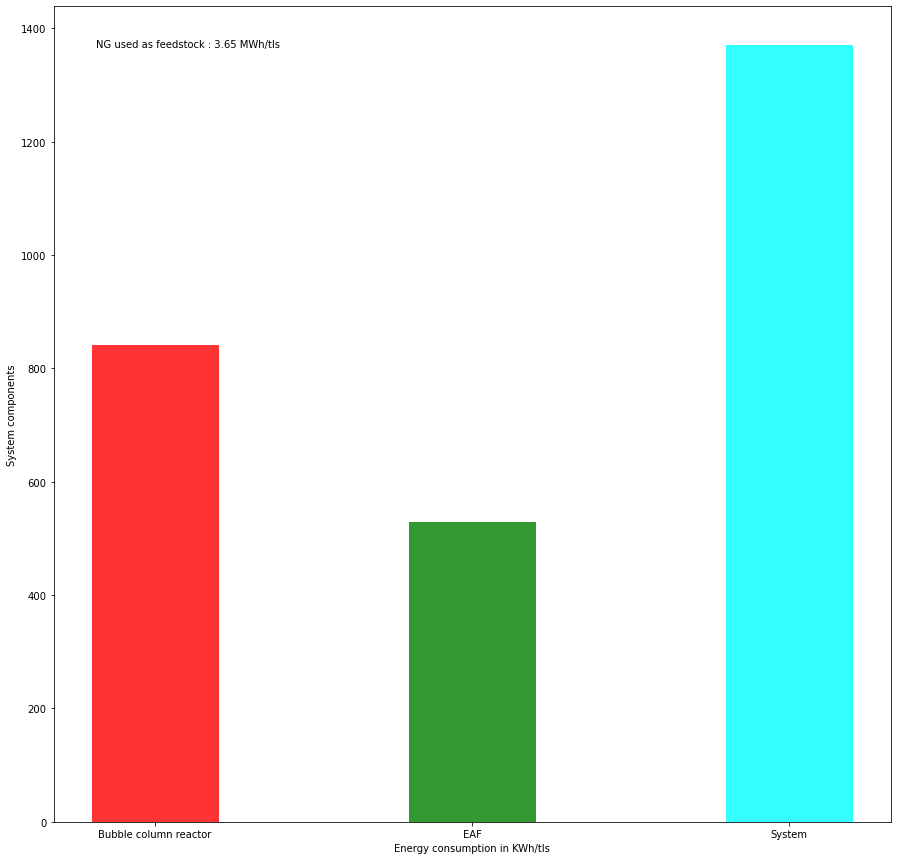

In [58]:
energy_consumption=[H_per_ton_steel*1000,el_eaf,E_total_MWh*1000]
components=['Bubble column reactor','EAF','System']
my_colors=['r','g','cyan']
plt.bar(components, energy_consumption,color=my_colors,alpha=0.8,width=0.4)
plt.ylabel('System components')
plt.xlabel('Energy consumption in KWh/tls')
plt.annotate('NG used as feedstock : 3.65 MWh/tls', xy=(0.05, 0.95), xycoords='axes fraction')
#plt.savefig('Energy_consumption.png',dpi=1200, bbox_inches='tight')
#plt.savefig('Energy_consumption_pyrolysis.pdf',dpi=1200, bbox_inches='tight')

In [59]:
print(E_total_MWh*1000+ng_energy_feedstock)
E_total_MWh

5184.5804357016195


1.3702265954531492

## Emission calculations 
Institute for Global Environmental Strategies (2020). List of Grid Emission Factors, version 10.8. Available at: https://pub.iges.or.jp/pub/iges-list-grid-emission-factors
All copyrights are reserved. The source must be clearly stated when this database is reproduced or transmitted in any form or by any means.

Value for Germany taken from : https://www.carbonfootprint.com/docs/2018_8_electricity_factors_august_2018_-_online_sources.pdf

In [60]:




## CO2 emission
 
#For this investigation,
#CO2 emissions for the natural gas supply chain are assumed to sum
#up to 17.2 gCO2/MJ1 considering emissions for natural gas production,
#long distance transport and distribution in a high pressure system

# Emissions from hydrogen production
# can be divided into direct and indirect emissions 
reac_ems_dr=(total_ng_req_tls*ng_up_em_kg)/1000 # upstream emissions are considered
reac_ems_indr=H_per_ton_steel*emission_factor #emission factor in tco2/MWh

    
EAF_co2=0.050 #ton/tls from exhaust gases 
cao_emissions=0.056 #tco2/tls calcination of caco3
co2_eaf_electrode=0.0070 #tco2/tls use of electrodes
pellet_production=0.12#tco2/tls # upstream emissions from pellet production

hdri_eaf_ems_dr=(EAF_co2+cao_emissions+co2_eaf_electrode+pellet_production)#tco2/tls
hdri_eaf_ems_indr =(EL_total_MWh*emission_factor) #tco2/tls


total_emission=(reac_ems_dr+reac_ems_indr+hdri_eaf_ems_dr+hdri_eaf_ems_indr)

total_emission_cost=((hdri_eaf_ems_dr+reac_ems_dr)*emission_cost*steel_prod_yr)/10**6 # in Million USD

total_emission

0.9014143433788282

In [61]:
emission_types=['Reactor-direct','Reactor indirect','HDRI-EAF direct','HDRI-EAF indirect','System-total']
emissions=[reac_ems_dr,reac_ems_indr,hdri_eaf_ems_dr,hdri_eaf_ems_indr,total_emission]
#plt.bar(emission_types,emissions)
#df=pd.DataFrame({"Emission": emissions},index=emission_types)
#df.plot(kind="bar",stacked=True)

In [62]:
def emission_system(emission_factor):# Emissions from hydrogen production
# can be divided into direct and indirect emissions 
    reac_ems_dr=(total_ng_req_tls*ng_up_em_kg)/1000 # upstream emissions are considered
    reac_ems_indr=H_per_ton_steel*emission_factor #emission factor in tco2/MWh


    EAF_co2=0.050 #ton/tls from exhaust gases 
    cao_emissions=0.056 #tco2/tls calcination of caco3
    co2_eaf_electrode=0.0070 #tco2/tls use of electrodes
    pellet_production=0.12#tco2/tls # upstream emissions from pellet production

    hdri_eaf_ems_dr=(EAF_co2+cao_emissions+co2_eaf_electrode+pellet_production)#tco2/tls
    hdri_eaf_ems_indr =(EL_total_MWh*emission_factor) #tco2/tls


    total_emission=(reac_ems_dr+reac_ems_indr+hdri_eaf_ems_dr+hdri_eaf_ems_indr)
    emissions=[reac_ems_dr,reac_ems_indr,hdri_eaf_ems_dr,hdri_eaf_ems_indr,total_emission]
    return(emissions)


In [63]:
 #emission_factor=0.5 #kgCO2/KWh
def energiron_emissions(emission_factor):
    ng_upstream_emission=17.2 #gCo2/MJ
    
    co2_selective_dri=235 #kg/tls
    co2_non_selective=306 #kg/tls
    natural_gas=2.22 # gcal/tls
    ng_cal=48000 #kj/kg
    natural_gas_kg=(2.22*10**6*4.184)/ng_cal #conver gcal to Kj 
    ng_emission_tls=(natural_gas_kg*ng_cal*ng_upstream_emission)/10**6 #convert KJ to MJ #kgco2/tls
    el_dri=79 # KWh/tls
    total_el=(el_dri+el_eaf)/1000 # MWh/tls
    indirect_ems_energiron=total_el*emission_factor
    direct_ems_energiron=(co2_non_selective+co2_selective_dri)/1000+ng_emission_tls/1000
    total_emission= direct_ems_energiron+indirect_ems_energiron
    return(total_emission)

In [64]:
emf_countries=[0.386,0.413,0.574,0.016,0.025]
#reference :https://www.sciencedirect.com/science/article/pii/S1361920916307933
countries=['DK','EU28','DE','SE','NO']
emission_countries=[]
for i in range(len(emf_countries)):
    emission_countries.append(emission_system(emf_countries[i]))


In [65]:
total_emission_energiron=[]
for i in range(len(emf_countries)):

    total_emission_energiron.append(energiron_emissions(emf_countries[i]))
    

In [66]:
#plotting a stacked bar chart to visuallize impact of different sources of emissions
df = pd.DataFrame(emission_countries)
df.columns = emission_types

df['NG-DRI_EAF']=total_emission_energiron
df['Countries']=countries
df

,Reactor-direct,Reactor indirect,HDRI-EAF direct,HDRI-EAF indirect,System-total,NG-DRI_EAF,Countries
0,0.102511,0.325059,0.233,0.203848,0.864418,0.935104,DK
1,0.102511,0.347797,0.233,0.218107,0.901414,0.951496,EU28
2,0.102511,0.483378,0.233,0.303132,1.122021,1.049239,DE
3,0.102511,0.013474,0.233,0.008450,0.357434,0.710476,SE
4,0.102511,0.021053,0.233,0.013203,0.369766,0.715939,NO


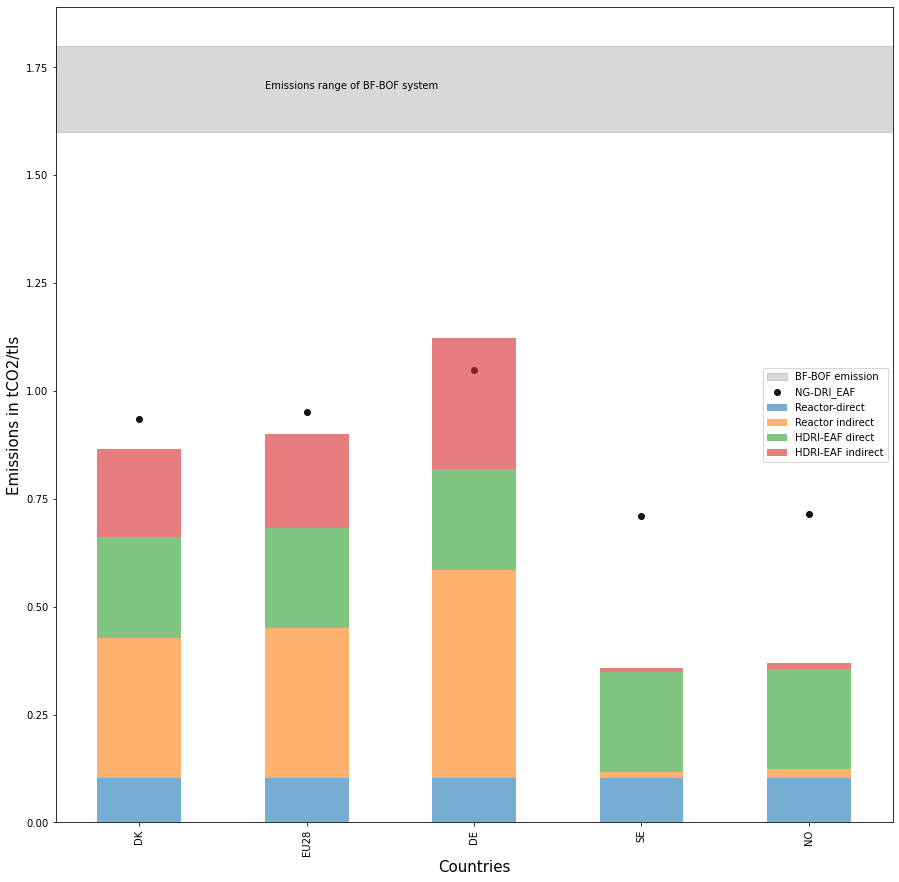

In [67]:
df.plot.bar(x='Countries',y=['Reactor-direct','Reactor indirect','HDRI-EAF direct','HDRI-EAF indirect'],stacked=True,alpha=0.6)
bf_bof_emission=[1.6,1.8]#tco2/tls

plt.axhspan(bf_bof_emission[0],bf_bof_emission[1], color='grey', alpha=0.3,label='BF-BOF emission')
#plt.axhspan(total_emission_energiron[3],total_emission_energiron[2],color='cyan', alpha=0.2,label='BF-BOF emission')
plt.scatter(countries,total_emission_energiron,color='black',alpha=0.9,label='NG-DRI_EAF')
plt.annotate('Emissions range of BF-BOF system', xy=(0.25, 0.90), xycoords='axes fraction')
#plt.annotate('Emissions range of NG-DRI-EAF system', xy=(0.60, 0.45), xycoords='axes fraction')

plt.ylabel('Emissions in tCO2/tls',fontsize=15)
plt.xlabel('Countries',fontsize=15)
plt.legend(loc='best')
plt.savefig('emissions_methane_pyrolysis.pdf',dpi=1200,bbox_inches='tight')

### Capital cost

In [68]:
def total_capital_cost(lang_factor_reac,lang_factor_dri_eaf):
#Cost of tin per kg 
### Capital cost of the metal
#### Source : https://tradingeconomics.com/commodity/tin
    cost_perkg=tinprice/1000 # Converted to Euros 


    tin_cost=weight_tin*cost_perkg
    #Cost of tin in million Euros
    million=10**6
    tin_cost_million=tin_cost/million


    #### Cost of the bubble column reactor

    """Considering that the reactor is made of 120 mm thick carbon steel. 
    The cost of stainless steel is assumed to be USD 2500 /ton. 
    The reactor is lined with refractory (magnesium oxide) layer of 600 mm 
    and the cost of refractory bricks is 800 USD/ton."""



    vol_steel_reactor=np.pi*((dia_reac+0.120/2)**2-(dia_reac/2)**2)*len_reac
    vol_refractory=np.pi*((dia_reac/2+0.6)**2-(dia_reac/2)**2)*len_reac
    weight_steel_reactor=(vol_steel_reactor*steel_density)/1000 # conversion to tons of steel
    weight_refractory=(vol_refractory*refractory_density)/1000 # conversion to tons 


    reactor_cost=((weight_steel_reactor*ss_steel_cost)+
                         (weight_refractory*refractory_cost)+(weight_steel_reactor*10000)+
                         (weight_refractory*1000))/10**6+(tin_cost_million)
    EAF_cost_per_ton_yr=140
        # The value includes installation costs 
        #https://iea-etsap.org/E-TechDS/PDF/I02-Iron&Steel-GS-AD-gct.pdf
    EAF_total_cost=(EAF_cost_per_ton_yr*steel_prod_yr)/10**6
        #### DRI Cost 
        #Link : https://www2.deloitte.com/content/dam/Deloitte/global/Documents/Manufacturing/gx_remaking%20the%20global%20steel%20industry_06_13.pdf

    DRI_cost_per_ton_yr=240 #USD/ton/per year
    # Cost of new DRI plant with 2 MT/annum =5.5 million euros or 6 million USD
     # A reduction in cost is considered as larger plants have smaller costs. (0.6)
    # The plant costs include all the costs including ISBL, OSBL, area development etc 
    # no Lang factor multiplication is required for such a plant
    #https://www.voestalpine.com/group/en/media/press-releases/2013-07-04-
     #voestalpine-entrusts-construction-of-the-direct-reduction-plant-in-texas-to-siemens-and-midrex/
    DRI_total_cost=(DRI_cost_per_ton_yr*steel_prod_yr)/10**6
    #### Pressure swing adsorber 

    PSA_cost=25 # Million USD 

    #### Gas fired metal furnace 
    #https://www.alibaba.com/showroom/gas-melting-furnace.html


    #lang_factor_reac=10
    #lang_factor_dri_eaf=6

    total_capital_cost=((((reactor_cost+PSA_cost+el_heater_cost)*lang_factor_reac)
                         +(EAF_total_cost+DRI_total_cost)))*lang_factor_dri_eaf
    #capital_cost={'EAF':EAF_total_cost,
            #'HDRI':DRI_total_cost,'Reactor':reactor_cost
            #,'PSA':PSA_cost,
            #'Electrical heater':el_heater_cost,
            #'Total capital cost':total_capital_cost}
    #df_capital_cost=pd.DataFrame.from_dict(capital_cost)
    return total_capital_cost


In [69]:
def operational_cost(ng_price,electricity_cost,iron_ore_cost):    
    eaf_op_cost_tls=32 #t/yr of dri
    dri_op_cost_tls=13#t/yr of dri

    ng_cost=(total_ng_req_tls/20)*ng_price
    iron_ore_cost_tls=(m1)*iron_ore_cost
    electricity_cost_tls=(electricity_cost*E_total_MWh)

    operational_cost_annual=(((ng_cost+iron_ore_cost_tls+electricity_cost_tls+eaf_op_cost_tls+
                               dri_op_cost_tls)*steel_prod_yr)/10**6)
    system_costs={'Natural gas':ng_cost,'Iron ore':iron_ore_cost_tls,'Electricity_cost':electricity_cost_tls,
                  'Total system costs':operational_cost_annual}
    return(operational_cost_annual)

In [70]:
#Maintenance cost
maintenance_cost_percentage=0.05
labour_cost_tls=40 #USD/tls
# 10% of the capital cost


maintenance_cost_yr=(maintenance_cost_percentage*total_capital_cost(lf_reac,lf_dri))
labour_cost_yr=(labour_cost_tls*steel_prod_yr)/10**6
 
   

In [71]:
# Depreciation cost

depreciation_yr=total_capital_cost(lf_reac,lf_dri)/plant_life

### Equivalent annual cost (EAC) of LS production

In [214]:
## Base case 
def lcop(interest_rate):
    ng_price=6.58
    electricity_cost=56.12
    iron_ore_cost=90
    i=interest_rate
    f_an=(i*((1+i)**plant_life)/((1+i)**plant_life-1))
    eac=[(total_capital_cost(lf_reac,lf_dri)*f_an)
         +operational_cost(ng_price,electricity_cost,iron_ore_cost)
    +maintenance_cost_yr+labour_cost_yr
    +total_emission_cost]
    lcop=eac[0]/(steel_prod_yr/10**6)
    return lcop

In [215]:
lcop(0.10)

702.7624225800904

## Revenue

In [74]:
   # Revenue
    # USD/ton


revenue_steel=((carbon_steel_price*steel_prod_yr)/10**6)
    #USD/ton
    

    # Revenue generated in Million USD /year 

revenue_carbon=(carbon_price*carbon_per_year*carbon_sold)/10**9


total_revenue_usd_million=revenue_steel+revenue_carbon

In [75]:
import numpy_financial as npf #for calculating the NPV and IRR 


In [76]:
def pyrolysis_npv(tax_rate,interest_rate,electricity_cost,
                 iron_ore_cost,emission_cost,carbon_steel_price,carbon_price,ng_price):
    lf_rkt=10
    lf_dri_eaf=2
    carbon_sold=0.6
    emission_factor=0.413
    steel_prod_yr=3078060
    #reactor cost calculation
    #plant_life=25
    #interest_rate=0.10
    #tax_rate=0.35
    ## Emission calculations 
    """Institute for Global Environmental Strategies (2020). List of Grid Emission Factors, version 10.8. Available at: https://pub.iges.or.jp/pub/iges-list-grid-emission-factors
    All copyrights are reserved. The source must be clearly stated when this database is reproduced or transmitted in any form or by any means.

    Value for Germany taken from : https://www.carbonfootprint.com/docs/2018_8_electricity_factors_august_2018_-_online_sources.pdf"""



  




    #For this investigation,
    #CO2 emissions for the natural gas supply chain are assumed to sum
    #up to 17.2 gCO2/MJ1 considering emissions for natural gas production,
    #long distance transport and distribution in a high pressure system

    # Emissions from hydrogen production
    # can be divided into direct and indirect emissions 
    reac_ems_dr=(total_ng_req_tls*ng_up_em_kg)/1000 # upstream emissions are considered
    reac_ems_indr=H_per_ton_steel*emission_factor #emission factor in tco2/MWh


    EAF_co2=0.050 #ton/tls from exhaust gases 
    cao_emissions=0.056 #tco2/tls calcination of caco3
    co2_eaf_electrode=0.0070 #tco2/tls use of electrodes
    pellet_production=0.12#tco2/tls # upstream emissions from pellet production

    hdri_eaf_ems_dr=(EAF_co2+cao_emissions+co2_eaf_electrode+pellet_production)#tco2/tls
    hdri_eaf_ems_indr =(EL_total_MWh*emission_factor) #tco2/tls


    total_emission=(reac_ems_dr+reac_ems_indr+hdri_eaf_ems_dr+hdri_eaf_ems_indr)

     #Emission cost
     # The emissions costs are associated with direct emissions within the system boundar and not with
    #the indirect emissions from the use of electricity.  
    total_emission_cost=((hdri_eaf_ems_dr+reac_ems_dr)*emission_cost*steel_prod_yr)/10**6 # in Million USD


    
  



    #total_capital_cost=total_capital_cost(lf_rkt,lf_dri_eaf) 

    #operational_cost_annual=operational_cost(ng_price,electricity_cost)

   

    maintenance_cost_yr=(maintenance_cost_percentage*total_capital_cost(lf_rkt,lf_dri_eaf))
    labour_cost_yr=(labour_cost_tls*steel_prod_yr)/10**6



    

    # Depreciation cost

    depreciation_yr=total_capital_cost(lf_rkt,lf_dri_eaf)/plant_life

    ## Revenue

       # Revenue
        # USD/ton


    revenue_steel=((carbon_steel_price*steel_prod_yr)/10**6)
        #USD/ton


        # Revenue generated in Million USD /year 

    revenue_carbon=(carbon_price*carbon_per_year*carbon_sold)/10**9


    total_revenue_usd_million=revenue_steel+revenue_carbon


    years=np.arange(0,plant_life,1)
    Years=np.round(years,0)
    production_steel=np.repeat(steel_prod_yr/10**6,plant_life).tolist()
    #production_hydrogen=np.repeat(h2_prod_yr/1000000,plant_life).tolist()
    
    
       
        
       
  
    capital_cost_yr=np.repeat(0,plant_life).tolist()
    capital_cost_yr[0]=(total_capital_cost(lf_rkt,lf_dri_eaf)/3)
    capital_cost_yr[1]=(total_capital_cost(lf_rkt,lf_dri_eaf))*(2/3)
    operational_cost_yr=np.repeat(operational_cost(ng_price,electricity_cost,iron_ore_cost),plant_life).tolist()
    maintenance_cost=np.repeat(maintenance_cost_yr,plant_life).tolist()
    labour_cost=np.repeat(labour_cost_yr,plant_life).tolist()
    emission_cost=np.repeat(total_emission_cost,plant_life).tolist()
    depreciation_cost=np.repeat(depreciation_yr,plant_life).tolist()
    total_revenue=np.repeat(total_revenue_usd_million,plant_life).tolist()

    for i in range(2):
        production_steel[i]=0
        operational_cost_yr[i]=0
        labour_cost[i]=0
        maintenance_cost[i]=0
        emission_cost[i]=0 
        depreciation_cost[i]=0
        total_revenue[i]=0
    # tax calculation
   
    tax_cost=[(total_revenue[i]-(capital_cost_yr[i]+operational_cost_yr[i]+labour_cost[i]
                                           +maintenance_cost[i]+
                                 emission_cost[i]+
                                 depreciation_cost[i]))*tax_rate for i in range(plant_life)]
    tax_cost[0]=0
    tax_cost[1]=0
   
    cash_flow=[total_revenue[i]-(capital_cost_yr[i]+
                                           operational_cost_yr[i]+labour_cost[i]
                                           +maintenance_cost[i]
                                 +emission_cost[i]+tax_cost[i])for i in range(plant_life)]
    npv=npf.npv(interest_rate,cash_flow)
    irr=npf.irr(cash_flow)
    #return(NPV_methane_pyrolysis,IRR_system)
    #financial_parameters=npv
    return [npv,irr,cash_flow]
    
    


In [217]:
plant_life=20

ng_price=6.58 #USD/MMBTU
iron_ore_cost=90 #usd/ton
electricity_cost=56.12 #USD/MWh # Germany
emission_cost=30# USD 30 per ton 
carbon_steel_price=650 #USD/ton
tax_rate=0.25
interest_rate=0.08
emission_factor=0.413# corresponsding to german emission factor
carbon_price=200
# Assume that 60% of the carbon produced could be sold
carbon_sold=0.6
baseline=[tax_rate,interest_rate,electricity_cost,
                 iron_ore_cost,emission_cost,carbon_steel_price,carbon_price,ng_price]
baseline_npv=pyrolysis_npv(*baseline)[0]
baseline_irr=pyrolysis_npv(*baseline)[1]
baseline_npv

-862.1907771831499

In [161]:

from SALib.sample import saltelli
from SALib.analyze import sobol



problem = {
  'num_vars': 8,
  'names': ['tax_rate', 
'interest_rate',
'electricity_cost',
'iron_ore_cost',
'emission_cost',
'carbon_steel_price',
'carbon_price',
'ng_price'],
  'bounds': [
[0.25,0.35],      
[0.06,0.12],
[20,60],
[75,95],
[40,100],
[600,700],
[100,300],
[4,7]]
}

# Generate samples
param_values = saltelli.sample(problem,1000)


In [162]:

Y=np.array([pyrolysis_npv(*param_values[i][:])[0] for i in range(len(param_values))])



In [163]:
# Perform analysis
Si = sobol.analyze(problem, Y)
#print_to_console=True
# Returns a dictionary with keys 'S1', 'S1_conf', 'ST', and 'ST_conf'
# (first and total-order indices with bootstrap confidence intervals

In [164]:
s2=Si['S2']
S2_conf=Si['S2_conf']

In [165]:
sensitivity_results=Si
del sensitivity_results['S2_conf']
del sensitivity_results['S2']

In [166]:
df_results=pd.DataFrame.from_dict(sensitivity_results)

In [167]:
df_results['Parameters']=['Tax_rate', 'Interest rate', 'Electricity cost','Iron ore cost',
            'Emission cost','Carbon steel price','Carbon price',
                          'NG price']
df_results

,S1,S1_conf,ST,ST_conf,Parameters
0,0.010174,0.010206,0.012329,0.001163,Tax_rate
1,0.375070,0.048319,0.382192,0.032801,Interest rate
2,0.112151,0.030830,0.108457,0.010675,Electricity cost
3,0.036805,0.016706,0.036948,0.003567,Iron ore cost
4,0.014204,0.011078,0.014654,0.001463,Emission cost
5,0.352302,0.054533,0.359392,0.033793,Carbon steel price
6,0.019921,0.011526,0.019693,0.001799,Carbon price
7,0.064628,0.022703,0.067357,0.006486,NG price


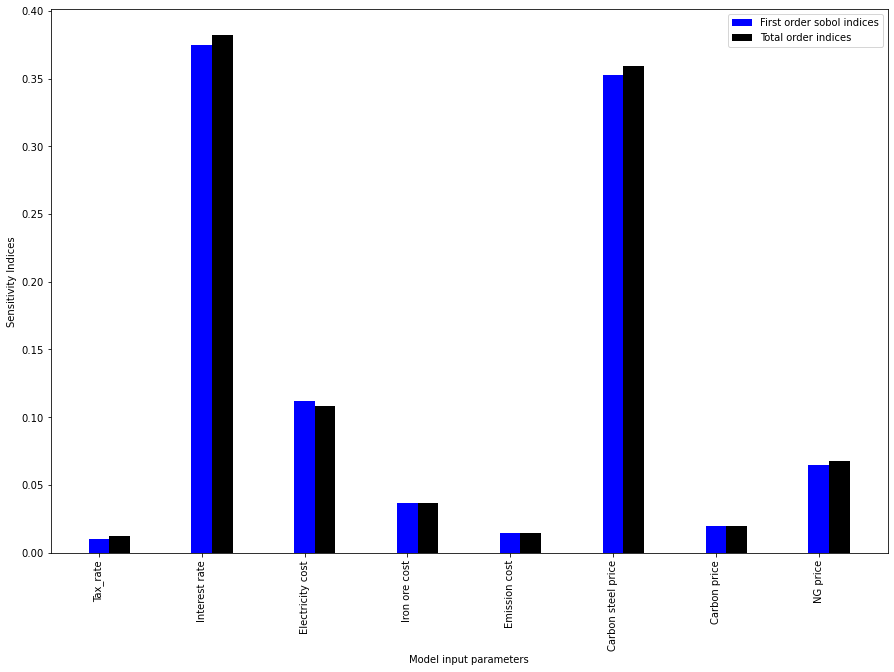

In [168]:
#df_results.plot.bar(x='Parameters',y=['S1', 'ST'],figsize=(15,15))
fig=plt.subplots(figsize=(15,10))
Labels=df_results['Parameters']
y_pos=np.arange(len(Labels))
#y_pos=df_results_irr['Parameters']
plt.bar(y_pos + 0,df_results['S1'],width=0.2,color='blue',label='First order sobol indices',alpha=1)
plt.bar(y_pos + 0.2,df_results['ST'],width=0.2,color='black',label='Total order indices',alpha=1)
plt.xticks(y_pos, Labels,rotation='vertical')
plt.ylabel('Sensitivity Indices')
plt.xlabel('Model input parameters')
plt.legend(loc='best')

In [169]:
df_second_sobol=pd.DataFrame(s2)
df_second_sobol['Parameters']=['Tax_rate', 'Interest rate', 'Electricity cost','Iron ore cost',
            'Emission cost','Carbon steel price','Carbon price',
                          'NG price']
df_second_sobol.columns=['Tax_rate', 'Interest rate', 'Electricity cost','Iron ore cost',
            'Emission cost','Carbon steel price','Carbon price',
                          'NG price','Parameters']

df_second_sobol

,Tax_rate,Interest rate,Electricity cost,Iron ore cost,Emission cost,Carbon steel price,Carbon price,NG price,Parameters
0,NaN,0.001566,0.001530,0.000969,0.000531,0.000523,0.000482,0.001220,Tax_rate
1,NaN,NaN,-0.003663,-0.002779,-0.002224,0.001762,-0.006350,-0.000543,Interest rate
2,NaN,NaN,NaN,-0.007292,-0.007472,-0.006166,-0.008602,-0.008881,Electricity cost
3,NaN,NaN,NaN,NaN,-0.002208,-0.002109,-0.002555,-0.003190,Iron ore cost
4,NaN,NaN,NaN,NaN,NaN,-0.000011,0.000041,0.000720,Emission cost
5,NaN,NaN,NaN,NaN,NaN,NaN,0.000144,0.001175,Carbon steel price
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003632,Carbon price
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NG price


In [170]:
Z=np.array([pyrolysis_npv(*param_values[i][:])[1] for i in range(len(param_values))])

In [171]:
# Perform analysis
irr = sobol.analyze(problem, Z)
#print_to_console=True
# Returns a dictionary with keys 'S1', 'S1_conf', 'ST', and 'ST_conf'
# (first and total-order indices with bootstrap confidence intervals

In [172]:
s2=irr['S2']
S2_conf=irr['S2_conf']

In [173]:
irr_sensitivity_results=irr
del irr_sensitivity_results['S2_conf']
del irr_sensitivity_results['S2']

In [174]:
df_results_irr=pd.DataFrame.from_dict(irr_sensitivity_results)

In [175]:
df_results_irr['Parameters']=['Tax_rate', 'Interest rate', 'Electricity cost','Iron ore cost',
            'Emission cost','Carbon steel price','Carbon price',
                          'NG price']
df_results_irr

,S1,S1_conf,ST,ST_conf,Parameters
0,0.016380,0.012511,0.018425,0.001863,Tax_rate
1,0.000000,0.000000,0.000000,0.000000,Interest rate
2,0.177277,0.038117,0.176178,0.015158,Electricity cost
3,0.057912,0.019831,0.060044,0.005524,Iron ore cost
4,0.023546,0.013653,0.023961,0.001997,Emission cost
5,0.579634,0.058315,0.582305,0.045984,Carbon steel price
6,0.031722,0.014671,0.032197,0.003124,Carbon price
7,0.103127,0.026346,0.108260,0.010196,NG price


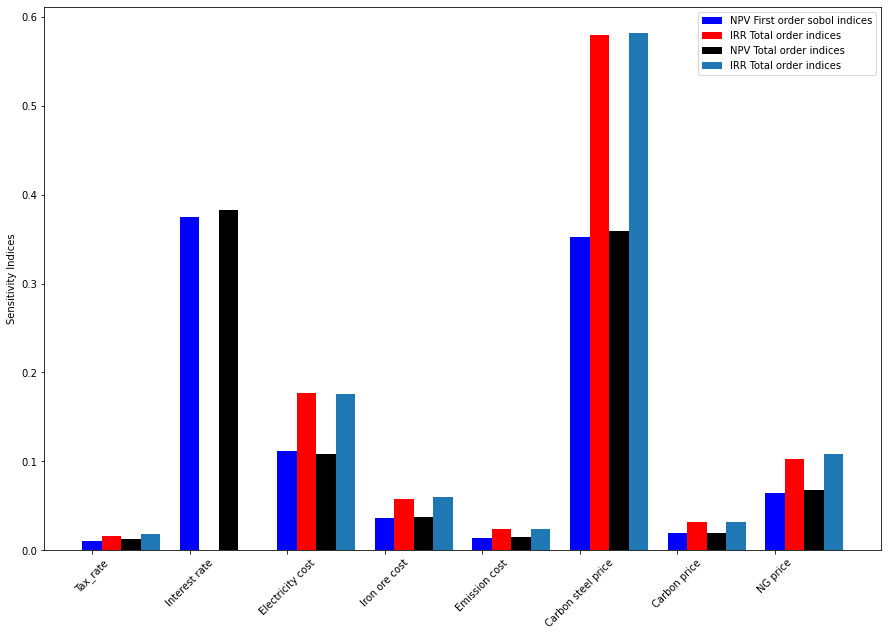

In [213]:
#df_results.plot.bar(x='Parameters',y=['S1', 'ST'],figsize=(15,15))
fig=plt.subplots(figsize=(15,10))
Labels=df_results_irr['Parameters']
y_pos=np.arange(len(Labels))
#y_pos=df_results_irr['Parameters']
plt.bar(y_pos + 0,df_results['S1'],width=0.2,color='blue',label='NPV First order sobol indices',alpha=1)
plt.bar(y_pos + 0.2,df_results_irr['S1'],width=0.2,color='red',label='IRR Total order indices',alpha=1)
plt.bar(y_pos + 0.4,df_results['ST'],width=0.2,color='black',label='NPV Total order indices',alpha=1)
plt.bar(y_pos + 0.6,df_results_irr['ST'],width=0.2,label='IRR Total order indices',alpha=1)
plt.xticks(y_pos, Labels,rotation=45)
plt.ylabel('Sensitivity Indices')
#plt.xlabel('Model input parameters')
plt.legend(loc='best')

plt.savefig('Global_sensitivity_methane_pyrolysis.pdf',dpi=1200)

In [177]:
###Local sensitivity analysis


In [178]:
## Generation of input variables for one at a time sensitivity analysis
variation=np.arange(-20,21,5)

p=[1+(i/100) for i in variation] # P varies from -1.20 to 1.20
change=[x*100 for x in p]
tax_rate_n=[tax_rate*x for x in p] # 35% tax rate has been assumed
interest_rate_n=[interest_rate*x for x in p] # Interest rate of 10%
iron_ore_cost_n=[iron_ore_cost*x for x in p] #USD/ton
#steel_prod_yr_n=[steel_prod_yr*p) # plant capacity of 2.5 Mt/year
electricity_cost_n=[electricity_cost*x for x in p]#usd/MWh
#emission_factor_n=[emission_factor*p)
emission_cost_n=[emission_cost*x for x in p] #usd/ton
carbon_steel_price_n=[carbon_steel_price*x for x in p] #usd/ton
carbon_price_n=[carbon_price*x for x in p]
#carbon_sold_n=[carbon_sold*p)
ng_price_n=[ng_price*x for x in p]


In [179]:
#Tax_rate is varied 
tax_rate_s=[pyrolysis_npv(tax_rate_n[i],interest_rate,electricity_cost,
                 iron_ore_cost,emission_cost,carbon_steel_price,carbon_price,ng_price)[0] 
            for i in range(len(tax_rate_n))]
#Interest rate is varied
interest_rate_s=[(pyrolysis_npv(tax_rate,interest_rate_n[i],electricity_cost,
                 iron_ore_cost,emission_cost,carbon_steel_price,carbon_price,ng_price))[0] 
                 for i in range(len(tax_rate_n))]

iron_ore_cost_s=[(pyrolysis_npv(tax_rate,interest_rate,electricity_cost,
                 iron_ore_cost_n[i],emission_cost,carbon_steel_price,carbon_price,ng_price))[0]
                 for i in range(len(tax_rate_n))]


electricity_cost_s=[(pyrolysis_npv(tax_rate,interest_rate,electricity_cost_n[i],
                     iron_ore_cost,emission_cost,carbon_steel_price,carbon_price,ng_price))[0]
                    for i in range(len(tax_rate_n))]               
                 
# Emission prices are varied              
emission_cost_s=[(pyrolysis_npv(tax_rate,interest_rate,electricity_cost,
                     iron_ore_cost,emission_cost_n[i],carbon_steel_price,carbon_price,ng_price))[0]
                 for i in range(len(tax_rate_n))] #usd/ton

carbon_steel_price_s=[(pyrolysis_npv(tax_rate,interest_rate,electricity_cost,
                     iron_ore_cost,emission_cost,carbon_steel_price_n[i],carbon_price,ng_price))[0]
                      for i in range(len(tax_rate_n))] #usd/t


carbon_price_s=[(pyrolysis_npv(tax_rate,interest_rate,electricity_cost,
                     iron_ore_cost,emission_cost,carbon_steel_price,carbon_price_n[i],ng_price))[0] 
                for i in range(len(tax_rate_n))] #u



ng_price_s=[(pyrolysis_npv(tax_rate,interest_rate,electricity_cost,
                     iron_ore_cost,emission_cost,carbon_steel_price,carbon_price,ng_price_n[i]))[0]
            for i in range(len(tax_rate_n))] #u



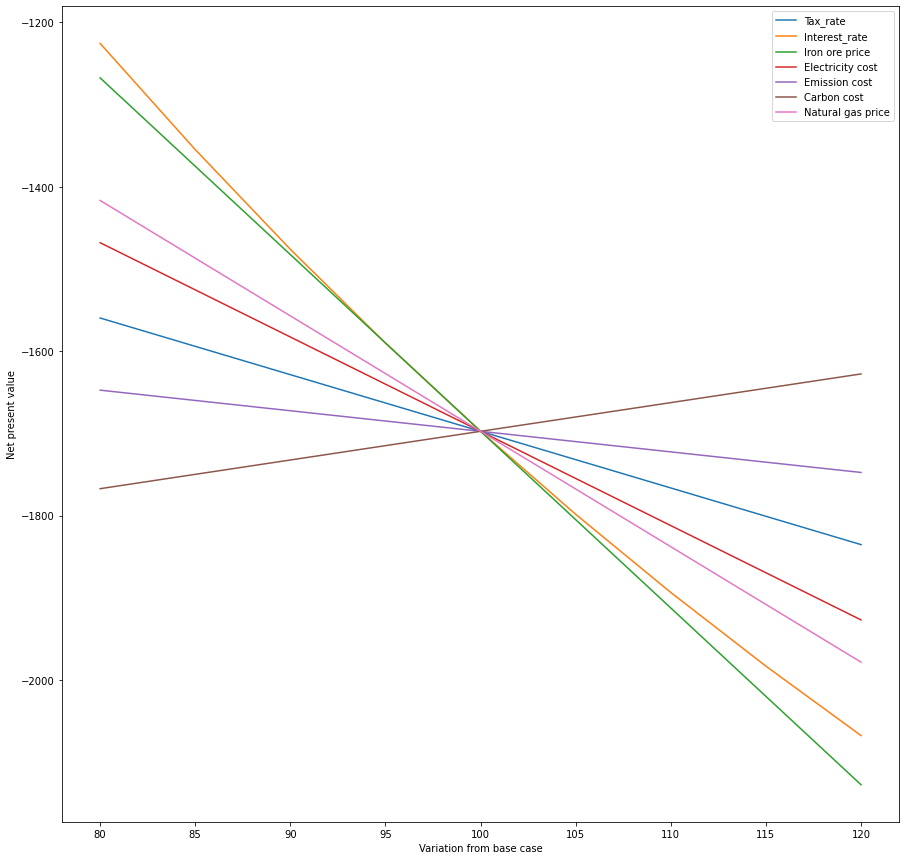

In [180]:
plt.plot(change,tax_rate_s,label='Tax_rate')
plt.plot(change,interest_rate_s,label='Interest_rate')
plt.plot(change,iron_ore_cost_s,label='Iron ore price')
#plt.plot(change,steel_prod_yr_s,label='Steel_prod_yr')
#plt.plot(change,emission_factor_s,label='Grid emission_factor')
plt.plot(change,electricity_cost_s,label='Electricity cost')
plt.plot(change,emission_cost_s,label='Emission cost')
plt.plot(change,carbon_price_s,label='Carbon cost')
#plt.plot(change,carbon_sold_s,label='Carbon sold',color='b')
#plt.plot(change,carbon_steel_price_s,label='Carbon steel price')
plt.plot(change,ng_price_s,label='Natural gas price')
plt.xlabel('Variation from base case')
plt.ylabel('Net present value')
plt.legend(loc='best')
"""plt.savefig('NPV sensitivity.png',dpi=1200, bbox_inches='tight')"""
plt.savefig('NPV_sensitivity_methane_pyrolysis.pdf',dpi=1200)

In [181]:
tax_rate_npv=[((baseline_npv-x)/(baseline_npv))*100 for x in tax_rate_s]

In [182]:
interest_rate_npv=[((baseline_npv-x)/(baseline_npv))*100 for x in interest_rate_s]    

In [183]:
iron_ore_cost_npv=[((baseline_npv-x)/(baseline_npv))*100 for x in iron_ore_cost_s]

In [184]:
electricity_cost_npv=[((baseline_npv-x)/(baseline_npv))*100 for x in electricity_cost_s]

In [185]:
emission_cost_npv=[((baseline_npv-x)/(baseline_npv))*100 for x in emission_cost_s]

In [186]:
carbon_steel_price_npv=[((baseline_npv-x)/(baseline_npv))*100 for x in carbon_steel_price_s]

In [187]:
ng_price_npv=[((baseline_npv-x)/(baseline_npv))*100 for x in ng_price_s]

In [188]:
carbon_price_npv=[((baseline_npv-x)/(baseline_npv))*100 for x in carbon_price_s]

In [189]:
change_variables_per=['-20', '-15', '-10', '-5', '0', '+5', '+10', '+15', '+20']
npv_dict={'Tax rate': tax_rate_npv,'Interest rate':interest_rate_npv,'Iron ore price':iron_ore_cost_npv,
         'Electricity cost':electricity_cost_npv,
         'Emission cost':emission_cost_npv,'Carbon price':carbon_price_npv,
         'Natural gas price':ng_price_npv,'Carbon steel price':carbon_steel_price_npv,'%Change':change_variables_per}
    
df_npv=pd.DataFrame.from_dict(npv_dict,orient='index')

In [190]:
df_npv=df_npv.transpose()
df_npv

,Tax rate,Interest rate,Iron ore price,Electricity cost,Emission cost,Carbon price,Natural gas price,Carbon steel price,%Change
0,8.11887,27.7914,25.3248,13.5147,2.94832,-4.11105,16.5415,-114.238,-20
1,6.08915,20.1864,18.9936,10.1361,2.21124,-3.08329,12.4061,-85.6786,-15
2,4.05944,13.0399,12.6624,6.75737,1.47416,-2.05553,8.27077,-57.119,-10
3,2.02972,6.32069,6.33121,3.37868,0.737079,-1.02776,4.13538,-28.5595,-5
4,-0,-0,-0,-0,-0,-0,-0,-0,0
5,-2.02972,-5.94883,-6.33121,-3.37868,-0.737079,1.02776,-4.13538,28.5595,+5
6,-4.05944,-11.5504,-12.6624,-6.75737,-1.47416,2.05553,-8.27077,57.119,+10
7,-6.08915,-16.8276,-18.9936,-10.1361,-2.21124,3.08329,-12.4061,85.6786,+15
8,-8.11887,-21.8014,-25.3248,-13.5147,-2.94832,4.11105,-16.5415,114.238,+20


In [191]:
change_variables_per=['-20', '-15', '-10', '-5', '0', '+5', '+10', '+15', '+20']

/home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
/home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


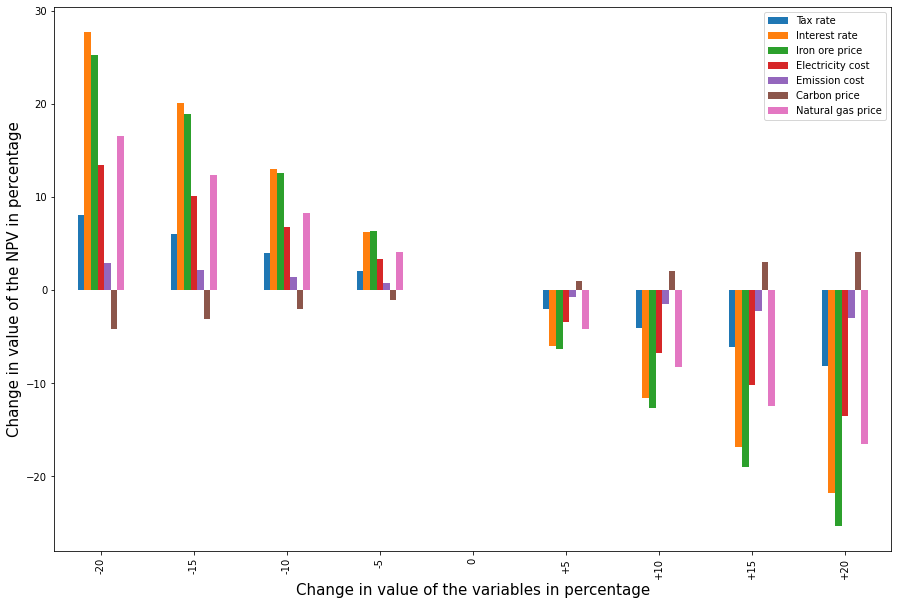

In [192]:
df_npv.plot.bar(x='%Change',y=['Tax rate', 'Interest rate', 'Iron ore price',
                               'Electricity cost', 'Emission cost', 'Carbon price', 'Natural gas price']
                ,stacked=False,figsize=(15,10))
plt.xlabel('Change in value of the variables in percentage',Fontsize=15)
plt.ylabel('Change in value of the NPV in percentage',Fontsize=15)
plt.legend(loc='best')
plt.savefig('NPV_percentage_change.pdf',dpi=1200, bbox_inches='tight')

In [193]:
baseline_irr=pyrolysis_npv(*baseline)[1]
baseline_irr

0.043834752331879834

In [194]:
#Tax_rate is varied 
tax_rate_t=[pyrolysis_npv(tax_rate_n[i],interest_rate,electricity_cost,
                 iron_ore_cost,emission_cost,carbon_steel_price,carbon_price,ng_price)[1] 
            for i in range(len(tax_rate_n))]
#Interest rate is varied
interest_rate_t=[(pyrolysis_npv(tax_rate,interest_rate_n[i],electricity_cost,
                 iron_ore_cost,emission_cost,carbon_steel_price,carbon_price,ng_price))[1] 
                 for i in range(len(tax_rate_n))]

iron_ore_cost_t=[(pyrolysis_npv(tax_rate,interest_rate,electricity_cost,
                 iron_ore_cost_n[i],emission_cost,carbon_steel_price,carbon_price,ng_price))[1]
                 for i in range(len(tax_rate_n))]


electricity_cost_t=[(pyrolysis_npv(tax_rate,interest_rate,electricity_cost_n[i],
                     iron_ore_cost,emission_cost,carbon_steel_price,carbon_price,ng_price))[1]
                    for i in range(len(tax_rate_n))]               
                 
# Emission prices are varied              
emission_cost_t=[(pyrolysis_npv(tax_rate,interest_rate,electricity_cost,
                     iron_ore_cost,emission_cost_n[i],carbon_steel_price,carbon_price,ng_price))[1]
                 for i in range(len(tax_rate_n))] #usd/ton

carbon_steel_price_t=[(pyrolysis_npv(tax_rate,interest_rate,electricity_cost,
                     iron_ore_cost,emission_cost,carbon_steel_price_n[i],carbon_price,ng_price))[1]
                      for i in range(len(tax_rate_n))] #usd/t


carbon_price_t=[(pyrolysis_npv(tax_rate,interest_rate,electricity_cost,
                     iron_ore_cost,emission_cost,carbon_steel_price,carbon_price_n[i],ng_price))[1] 
                for i in range(len(tax_rate_n))] #u



ng_price_t=[(pyrolysis_npv(tax_rate,interest_rate,electricity_cost,
                     iron_ore_cost,emission_cost,carbon_steel_price,carbon_price,ng_price_n[i]))[1]
            for i in range(len(tax_rate_n))] #u



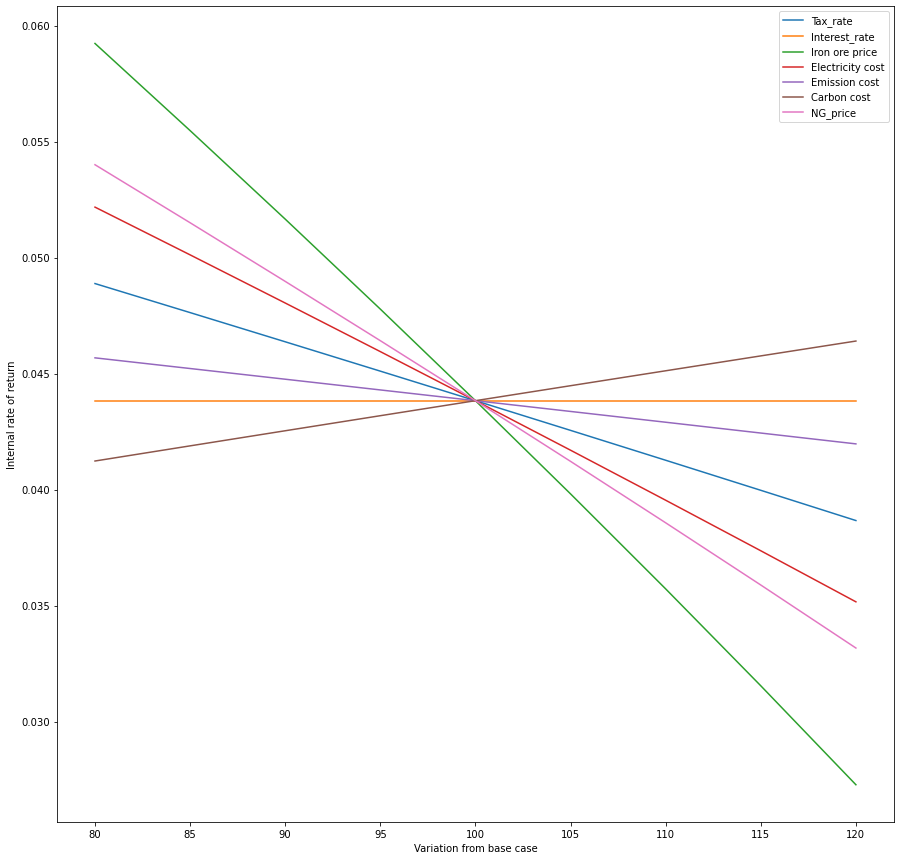

In [197]:
plt.plot(change,tax_rate_t,label='Tax_rate')
plt.plot(change,interest_rate_t,label='Interest_rate')
plt.plot(change,iron_ore_cost_t,label='Iron ore price')
#plt.plot(change,steel_prod_yr_t,label='Steel_prod_yr')
#plt.plot(change,emission_factor_t,label='Grid emission_factor')
plt.plot(change,electricity_cost_t,label='Electricity cost')
plt.plot(change,emission_cost_t,label='Emission cost')
plt.plot(change,carbon_price_t,label='Carbon cost')
#plt.plot(change,carbon_sold_t,label='Carbon sold')
#plt.plot(change,carbon_steel_price_s,label='Carbon steel price')
plt.plot(change,ng_price_t,label='NG_price')
plt.xlabel('Variation from base case')
plt.ylabel('Internal rate of return')
plt.legend()
"""plt.savefig('NPV sensitivity.png',dpi=1200, bbox_inches='tight')"""
plt.savefig('IRR_sensitivity_methane_pyrolysis.pdf',dpi=1200, bbox_inches='tight')

In [210]:
tax_rate_irr=[((x-baseline_irr)/(baseline_irr))*100 for x in tax_rate_t]

interest_rate_irr=[((x-baseline_irr)/(baseline_irr))*100 for x in interest_rate_t]    

iron_ore_cost_irr=[((x-baseline_irr)/(baseline_irr))*100 for x in iron_ore_cost_t]

electricity_cost_irr=[((x-baseline_irr)/(baseline_irr))*100 for x in electricity_cost_t]

emission_cost_irr=[((x-baseline_irr)/(baseline_irr))*100 for x in emission_cost_t]

carbon_steel_price_irr=[((x-baseline_irr)/(baseline_irr))*100 for x in carbon_steel_price_t]

ng_price_irr=[((x-baseline_irr)/(baseline_irr))*100 for x in ng_price_t]

carbon_price_irr=[((x-baseline_irr)/(baseline_irr))*100 for x in carbon_price_t]

change_variables_per=['-20', '-15', '-10', '-5', '0', '+5', '+10', '+15', '+20']



In [211]:
irr_dict={'Tax rate': tax_rate_irr,'Interest rate':interest_rate_irr,'Iron ore price':iron_ore_cost_irr,
         'Electricity cost':electricity_cost_irr,
         'Emission cost':emission_cost_irr,'Carbon price':carbon_price_irr,
         'Natural gas price':ng_price_irr,'Carbon steel price':carbon_steel_price_irr,'%Change':change_variables_per}

In [212]:
    
df_irr=pd.DataFrame.from_dict(irr_dict,orient='index')
df_irr=df_irr.transpose()
df_irr

,Tax rate,Interest rate,Iron ore price,Electricity cost,Emission cost,Carbon price,Natural gas price,Carbon steel price,%Change
0,11.5175,0,35.1285,19.0336,4.21249,-5.93325,23.2039,-209.508,-20
1,8.66219,0,26.559,14.3398,3.16264,-4.44331,17.4981,-144.472,-15
2,5.79104,0,17.8535,9.60394,2.11061,-2.95782,11.7306,-90.2681,-10
3,2.90376,0,9.00353,4.82449,1.05641,-1.47673,5.89876,-42.8214,-5
4,0,0,0,0,0,0,0,0,0
5,-2.92057,0,-9.16722,-4.87109,-1.05862,1.47242,-5.96858,39.4568,+5
6,-5.85832,0,-18.5092,-9.79042,-2.11948,2.94057,-12.01,76.3584,+10
7,-8.8136,0,-28.0383,-14.7597,-3.18259,4.4045,-18.1276,111.256,+15
8,-11.7868,0,-37.7681,-19.7809,-4.24797,5.86426,-24.3247,144.543,+20


/home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
/home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


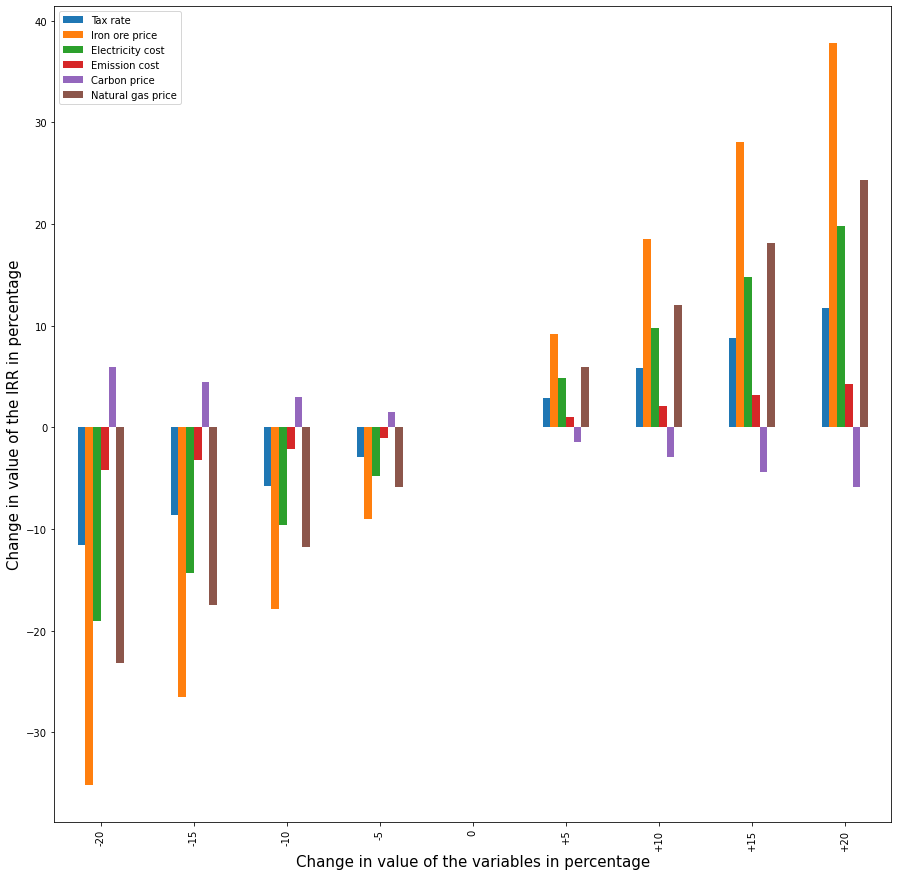

In [201]:
df_irr.plot.bar(x='%Change',y=['Tax rate', 'Iron ore price','Electricity cost', 'Emission cost', 'Carbon price',
       'Natural gas price'],stacked=False)
plt.xlabel('Change in value of the variables in percentage',Fontsize=15)
plt.ylabel('Change in value of the IRR in percentage',Fontsize=15)
plt.legend(loc='best')
plt.savefig('IRR_percentage_change.pdf',dpi=1200, bbox_inches='tight')

In [202]:
def energiron(tax_rate,interest_rate,steel_prod_yr,emission_factor,electricity_cost,
                 iron_ore_cost,emission_cost,carbon_steel_price,ng_price):
    plant_life=20
    
    
    iron_ore_dri=1.4 #t/t dri
    metallization=0.94
    oxygen_dri=55 #NM3/tls
    iron_ore_tls=iron_ore_dri/metallization
    natural_gas=2.22 # gcal/tls
    ng_cal=48000 #kj/kg
    natural_gas_kg=(2.22*10**6*4.184)/ng_cal #conver gcal to Kj 
    
    
    
    
    
    #emission_factor=0.5 #kgCO2/KWh
    ng_upstream_emission=17.2 #gCo2/MJ
    ng_emission_tls=(natural_gas_kg*ng_cal*ng_upstream_emission)/10**6 #convert KJ to MJ #kgco2/tls
    co2_selective_dri=235 #kg/tls
    co2_non_selective=306 #kg/tls
    el_dri=79 # KWh/tls
    total_el=(el_dri+el_eaf)/1000 # MWh/tls
    indirect_ems_energiron=total_el*emission_factor
    direct_ems_energiron=(co2_non_selective+co2_selective_dri)/1000+ng_emission_tls/1000
    total_emission= direct_ems_energiron+indirect_ems_energiron
    #### Economic parameters that could be included in the article
    EAF_cost_per_ton_yr=140
    # The value includes installation costs 
    #https://iea-etsap.org/E-TechDS/PDF/I02-Iron&Steel-GS-AD-gct.pdf
    EAF_total_cost=(EAF_cost_per_ton_yr*steel_prod_yr)/10**6
    #### DRI Cost 
    #Link : https://www2.deloitte.com/content/dam/Deloitte/global/Documents/Manufacturing/gx_remaking%20the%20global%20steel%20industry_06_13.pdf

    DRI_cost_per_ton_yr=240 #USD/ton/per year
    # Cost of new DRI plant with 2 MT/annum =5.5 million euros or 6 million USD
     # A reduction in cost is considered as larger plants have smaller costs. (0.6)
    # The plant costs include all the costs including ISBL, OSBL, area development etc 
    # no Lang factor multiplication is required for such a plant
    #https://www.voestalpine.com/group/en/media/press-releases/2013-07-04-
     #voestalpine-entrusts-construction-of-the-direct-reduction-plant-in-texas-to-siemens-and-midrex/
    DRI_total_cost=(DRI_cost_per_ton_yr*steel_prod_yr)/10**6
    #### Pressure swing adsorber 

    
    
    total_capital_cost=((EAF_total_cost+DRI_total_cost))*2
     ##Operational cost
    eaf_op_cost_tls=32 #t/yr of dri
    dri_op_cost_tls=13 #t/yr of dri
    ng_cost=((ng_price/21)*natural_gas_kg)# converting price/MMBTU to price/kg
    iron_ore_cost_tls=iron_ore_tls*iron_ore_cost
    electricity_cost_tls=total_el*electricity_cost
    operational_cost_annual=((ng_cost+iron_ore_cost_tls+electricity_cost_tls+
                              eaf_op_cost_tls+dri_op_cost_tls)*steel_prod_yr)/10**6
    #Maintenance cost
    maintenance_cost_percentage=0.10 
    labour_cost_tls=40 #USD/tls
    # 10% of the capital cost
    
    maintenance_cost_yr=((maintenance_cost_percentage*total_capital_cost))
    labour_cost_yr=((labour_cost_tls*steel_prod_yr)/10**6)
     #Emission cost
    total_emission_cost=((direct_ems_energiron*emission_cost*steel_prod_yr)/10**6) # in Million USD
    depreciation_yr=total_capital_cost/plant_life
     # Revenue
    # USD/ton
    total_revenue=(carbon_steel_price*steel_prod_yr)/10**6
     
    ## NPV and IRR calculations 
    years=np.arange(0,plant_life,1)
    Years=np.round(years,0)
    production_steel=np.repeat(steel_prod_yr/10**6,plant_life).tolist()
    #production_hydrogen=np.repeat(h2_prod_yr/1000000,plant_life).tolist()  
      
    capital_cost_yr=np.repeat(0,plant_life).tolist()
    capital_cost_yr[0]=(total_capital_cost/3)
    capital_cost_yr[1]=(total_capital_cost)*(2/3)
    operational_cost=np.repeat(operational_cost_annual,plant_life).tolist()
    maintenance_cost=np.repeat(maintenance_cost_yr,plant_life).tolist()
    labour_cost=np.repeat(labour_cost_yr,plant_life).tolist()
    emission_cost=np.repeat(total_emission_cost,plant_life).tolist()
    depreciation_cost=np.repeat(depreciation_yr,plant_life).tolist()
    total_revenue=np.repeat(total_revenue,plant_life).tolist()

    for i in range(2):
        production_steel[i]=0
        operational_cost[i]=0
        labour_cost[i]=0
        maintenance_cost[i]=0
        emission_cost[i]=0 
        depreciation_cost[i]=0
        total_revenue[i]=0
    # tax calculation
    
    
    tax_cost=[]
    for i in range(plant_life):
        tax_cost.append((total_revenue[i]-(capital_cost_yr[i]+operational_cost[i]+
                                           labour_cost[i]+maintenance_cost[i]
                                           +emission_cost[i]+depreciation_cost[i]))*tax_rate)
    for i in range(2):
        tax_cost[i]=0
    cash_flow=[]
    for i in range(plant_life):
        cash_flow.append(total_revenue[i]-(capital_cost_yr[i]+
                                           operational_cost[i]+labour_cost[i]
                                           +maintenance_cost[i]+emission_cost[i]+tax_cost[i]))
    npv=npf.npv(interest_rate,cash_flow)
    irr=npf.irr(cash_flow)
    #return(NPV_methane_pyrolysis,IRR_system)
    p=[npv,irr]
    q=cash_flow
    return p
  


In [203]:
plant_life=20

ng_price=6.58 #USD/MMBTU
iron_ore_cost=90 #usd/ton
electricity_cost=56.12 #USD/MWh # Germany
emission_cost=50# USD 30 per ton 
carbon_steel_price=700 #USD/ton
tax_rate=0.35
interest_rate=0.20
emission_factor=0.412 # corresponsding to german emission factor

baseline_energiron=[tax_rate,interest_rate,steel_prod_yr,emission_factor,electricity_cost,
                 iron_ore_cost,emission_cost,carbon_steel_price,ng_price]
baseline_energiron_npv=energiron(*baseline_energiron)[0]

In [204]:
baseline_energiron_npv

292.90200558329684

In [205]:
npv_energiron=energiron(*baseline_energiron)

In [206]:
npv_energiron

[292.90200558329684, 0.22920845809618218]

In [207]:
def lcop_energiron(interest_rate):
    
    plant_life=20
    iron_ore_cost=90
    electricity_cost=56.12
    emission_cost=50
    iron_ore_dri=1.4 #t/t dri
    metallization=0.94
    oxygen_dri=55 #NM3/tls
    iron_ore_tls=iron_ore_dri/metallization
    natural_gas=2.22 # gcal/tls
    ng_cal=48000 #kj/kg
    natural_gas_kg=(2.22*10**6*4.184)/ng_cal #conver gcal to Kj 
    
    
    
    
    
    #emission_factor=0.5 #kgCO2/KWh
    ng_upstream_emission=17.2 #gCo2/MJ
    ng_emission_tls=(natural_gas_kg*ng_cal*ng_upstream_emission)/10**6 #convert KJ to MJ #kgco2/tls
    co2_selective_dri=235 #kg/tls
    co2_non_selective=306 #kg/tls
    el_dri=79 # KWh/tls
    total_el=(el_dri+el_eaf)/1000 # MWh/tls
    indirect_ems_energiron=total_el*emission_factor
    direct_ems_energiron=(co2_non_selective+co2_selective_dri)/1000+ng_emission_tls/1000
    total_emission= direct_ems_energiron+indirect_ems_energiron
    #### Economic parameters that could be included in the article
    EAF_cost_per_ton_yr=140
    # The value includes installation costs 
    #https://iea-etsap.org/E-TechDS/PDF/I02-Iron&Steel-GS-AD-gct.pdf
    EAF_total_cost=(EAF_cost_per_ton_yr*steel_prod_yr)/10**6
    #### DRI Cost 
    #Link : https://www2.deloitte.com/content/dam/Deloitte/global/Documents/Manufacturing/gx_remaking%20the%20global%20steel%20industry_06_13.pdf

    DRI_cost_per_ton_yr=240 #USD/ton/per year
    # Cost of new DRI plant with 2 MT/annum =5.5 million euros or 6 million USD
     # A reduction in cost is considered as larger plants have smaller costs. (0.6)
    # The plant costs include all the costs including ISBL, OSBL, area development etc 
    # no Lang factor multiplication is required for such a plant
    #https://www.voestalpine.com/group/en/media/press-releases/2013-07-04-
     #voestalpine-entrusts-construction-of-the-direct-reduction-plant-in-texas-to-siemens-and-midrex/
    DRI_total_cost=(DRI_cost_per_ton_yr*steel_prod_yr)/10**6
    #### Pressure swing adsorber 

    
    
    total_capital_cost=((EAF_total_cost+DRI_total_cost))*2
     ##Operational cost
    eaf_op_cost_tls=32 #t/yr of dri
    dri_op_cost_tls=13 #t/yr of dri
    ng_cost=((ng_price/21)*natural_gas_kg)# converting price/MMBTU to price/kg
    iron_ore_cost_tls=iron_ore_tls*iron_ore_cost
    electricity_cost_tls=total_el*electricity_cost
    operational_cost_annual=((ng_cost+iron_ore_cost_tls+electricity_cost_tls+
                              eaf_op_cost_tls+dri_op_cost_tls)*steel_prod_yr)/10**6
    #Maintenance cost
    maintenance_cost_percentage=0.05
    labour_cost_tls=40 #USD/tls
    # 10% of the capital cost
    
    maintenance_cost_yr=((maintenance_cost_percentage*total_capital_cost))
    labour_cost_yr=((labour_cost_tls*steel_prod_yr)/10**6)
     #Emission cost
    total_emission_cost=((direct_ems_energiron*emission_cost*steel_prod_yr)/10**6) # in Million USD
    depreciation_yr=total_capital_cost/plant_life
     # Revenue
    # USD/ton
    i=interest_rate
    f_an=(i*((1+i)**plant_life)/((1+i)**plant_life-1))
   
    lang_factor=3
    iron_ore_cost=90
    electricity_cost=56.12 
    emission_cost=30
    eac=[total_capital_cost*f_an
         +operational_cost_annual
         +maintenance_cost_yr
         +labour_cost_yr
         +total_emission_cost]
    lcop=eac[0]/(steel_prod_yr/10**6)
    return lcop

In [208]:
## https://www.nrel.gov/docs/legosti/old/5173.pdf

In [209]:
lcop_energiron(0.10)

476.05376186684225